In [1]:
import re
import requests
import traceback
from bs4 import BeautifulSoup

In [2]:
def gethttptext(url,code='utf-8'):
    try:
        r=requests.get(url,timeout=30)
        r.raise_for_status()
        r.encoding=code
        #print(r.status_code)
        return r.text
    except:
        return ""

In [3]:
def getstocklist(list,stockurl):
    html=gethttptext(stockurl)
    soup=BeautifulSoup(html,'html.parser')
    a=soup.find_all('tr')
    for i in a:
        try:
            href=i.attrs['id']
            list.append(re.findall(r'[tr]\d{6}',href)[0])
        except:
            continue

In [4]:
def getstockinfo(list,stockurl,fpath):
    count=0
    for stock in list:
        url=stockurl+stock[1:]+".html"
        html=gethttptext(url)
        try:
            if html=='':
                continue
            infodict={}
            soup=BeautifulSoup(html,'html.parser')
            stockinfo=soup.find('div',attrs={'class':'merchandiseDetail'})

            name=stockinfo.find_all(attrs={'class':'fundDetail-tit'})[0]
            infodict.update({'股票名称':name.text.split()[0]})

            keylist=stockinfo.find_all('dt')
            valuelist=stockinfo.find_all('dd')
            for i in range(len(keylist)):
                key=keylist[i].text
                val=valuelist[i].text
                infodict[key]=val
            with open(fpath,'a',encoding='utf-8') as f:
                f.write(str(infodict)+'\n')
                count=count+1
                print('\r当前速度：{:.2f}%'.format(count*100/len(list)),end='')

        except:
            count = count + 1
            print('\r当前速度：{:.2f}%'.format(count * 100 / len(list)), end='')
            traceback.print_exc()
            continue

In [6]:
if __name__=="__main__":
    stock_list_url="https://fund.eastmoney.com/fund.html#os_0;isall_0;ft_;pt_1"
    stock_info_url="https://fund.eastmoney.com/"
    output_fire="F://py项目//BaiduStockInfo.txt"
    slist=[]
    getstocklist(slist,stock_list_url)
    getstockinfo(slist,stock_info_url,output_fire)

当前速度：100.00%

In [11]:
import re
import requests
import pymysql
import json
import time
def gethttptext(url):
    try:
        header = {"Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8",
                  "Cache-Control": "max-age=0",
                  "Connection": "keep-alive",
                  "Host": "maoyan.com",
                  "Referer": "http://maoyan.com/board",
                  "Upgrade-Insecure-Requests": "1",
                  "User-Agent": "Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/49.0.2623.75 Safari/537.36"}
        r=requests.get(url,headers=header,timeout=30)
        r.raise_for_status()
        r.encoding=r.apparent_encoding
        return r.text
    except:
        print("请求失败\n")
        return ""
def parsepage(html):
    try:
        pattern=re.compile('<dd>.*?board-index.*?>(\d*)</i>.*?data-src="(.*?)".*?name"><a'+
                           '.*?>(.*?)</a>.*?star">(.*?)</p>.*?releasetime">(.*?)</p>'+
                           '.*?integer">(.*?)</i>.*?fraction">(.*?)</i>.*?</dd>',re.S)
        item=re.findall(pattern,html)
        #print(item)
        for infomation in item:
            dic={
                'index':infomation[0],
                'image-url':infomation[1],
                'title':infomation[2],
                'star':infomation[3].strip()[3:],
                'time':infomation[4].strip()[5:],
                'score':infomation[5]+infomation[6],
            }
            yield dic
    except:
        print("解析失败")
        return ""

def write_to_file(item):
    with open('./猫眼电影Top100.txt','a',encoding='utf-8') as f:
        f.write(json.dumps(item,ensure_ascii=False)+'\n\n')

def write_to_mysql(item):
    db=pymysql.connect("localhost","root","root","maoyan",charset='utf-8')
    cursor=db.cursor()
    print(item)
    sql="insert into movies(rank,imagesurl,name,star,time,score) values(%s,%s,%s,%s,%s,%s)"
    try:
        cursor.execute(sql,item)
        db.commit()
        print("success")
    except:
        print("lose")
    cursor.close()
    db.close()


def main():
    start_url="https://maoyan.com/board/4?offset="
    depth=10
    for i in range(depth):
        url=start_url+str(10*i)
        html=gethttptext(url)
        items=parsepage(html)
        for item in items:
            list_1=list(item.values())
            write_to_file(item)
            #print(list_1)
            write_to_mysql(list_1)

if __name__=="__main__":
    main()

请求失败

请求失败

请求失败

请求失败

请求失败

请求失败

请求失败

请求失败



AttributeError: 'NoneType' object has no attribute 'encoding'

In [26]:
import re
import requests

In [27]:
def gethttptext(url):
    try:
        kv = {
            'cookie':'cna=kL/kF0zT1TcCAcrI7Na/TEcN; sca=8a7e6244; tbsa=30d08f305d08bc44e8b769ed_1609993607_3; atpsida=d1e8051b95f6bc92af6abfbb_1609993607_3',
            'user-agent':'Mozilla/5.0'
        }
        r=requests.get(url,headers=kv,timeout=30)
        r.raise_for_status()
        r.encoding=r.apparent_encoding
        return r.text
    except:
        print("提取失败")
        return ""

In [28]:
def parsepage(ilt,html):
    try:
        plt = re.findall(r'\"view_price\"\:\"[\d\.]*\"', html)
        tlt = re.findall(r'\"raw_title\"\:\".*?\"', html)
        # print(tlt)
        print(len(plt))
        for i in range(len(plt)):
            price = eval(plt[i].split(':')[1])
            title = eval(tlt[i].split(':')[1])
            ilt.append([title, price])
        # print(ilist)
    except:
        print("解析出错")

In [29]:
def printgoodslist(ilt):
    tplt="{:4}\t{:8}\t{:16}"
    print(tplt.format("序号","价格","商品名称"))
    count=0
    for g in ilt:
        count=count+1
        print(tplt.format(count,g[0],g[1]))

In [30]:
if __name__=="__main__":
    goods='蛋糕'
    depth=2
    start_url='https://s.taobao.com/search?q='+goods
    infolist=[]
    for i in range(depth):
        try:
            url=start_url+'&s='+str(44*i)
            html=gethttptext(url)
            parsepage(infolist,html)
        except:
            continue
    printgoodslist(infolist)

0
0
序号  	价格      	商品名称            


In [34]:
import requests
import bs4
from bs4 import BeautifulSoup

def gethttptext(url):
    try:
        r=requests.get(url,timeout=30)
        r.raise_for_status()
        r.encoding=r.apparent_encoding
        return r.text
    except:
        return ""

def fillunivlist(ulist,html):
    soup=BeautifulSoup(html,'html.parser')
    for tr in soup.find('tbody').children:
        if isinstance(tr,bs4.element.Tag):
            tds=tr('td')
            tda=tr('a')
            ulist.append([tds[0].get_text("",strip="true"),tda[0].string,tds[4].get_text("",strip="true")])

def printunivlist(ulist,num):
    tplt="{0:^10}\t{1:{3}^10}\t{2:^10}"
    print(tplt.format("排名","学校名称","总分",chr(12288)))
    for i in range(num):
        u=ulist[i]
        if u[2]!=None:
            print(tplt.format(u[0],u[1],u[2],chr(12288)))

def main():
    uinfo=[]
    url='https://www.shanghairanking.cn/rankings/bcur/201811'
    html=gethttptext(url)
    fillunivlist(uinfo,html)
    printunivlist(uinfo,30)

main()

    排名    	　　　学校名称　　　	    总分    
    1     	　　　清华大学　　　	   95.3   
    2     	　　　北京大学　　　	   78.6   
    3     	　　　浙江大学　　　	   73.9   
    4     	　　上海交通大学　　	   73.1   
    5     	　　　复旦大学　　　	    66    
    6     	　中国科学技术大学　	   61.9   
    7     	　　　南京大学　　　	   59.8   
    8     	　　华中科技大学　　	   59.1   
    9     	　　　中山大学　　　	   58.6   
    10    	　哈尔滨工业大学　　	   57.4   
    11    	　　　同济大学　　　	   56.4   
    12    	　　　武汉大学　　　	   55.5   
    13    	　　　东南大学　　　	   55.3   
    14    	　　西安交通大学　　	   54.2   
    15    	　北京航空航天大学　	    54    
    16    	　　　南开大学　　　	   53.9   
    17    	　　　四川大学　　　	   53.3   
    18    	　　　天津大学　　　	   52.4   
    19    	　　华南理工大学　　	   51.8   
    20    	　　北京师范大学　　	   51.7   
    21    	　　北京理工大学　　	   51.1   
    22    	　　　厦门大学　　　	   50.9   
    23    	　　　吉林大学　　　	   50.2   
    24    	　　　山东大学　　　	    50    
    25    	　　大连理工大学　　	   49.7   
    26    	　　　中南大学　　　	   49.5   
    27    	　　　苏州大学　　　	   48.8   
    28    	　对外经济贸易大学　	   47.7   
    29    	　　西北工业大学　　	   47.6   
    30    

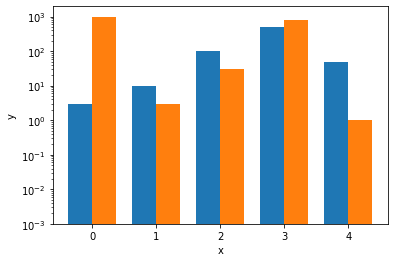

In [37]:
import matplotlib.pyplot as plt
import numpy as np

data = ((3, 1000), (10, 3), (100, 30), (500, 800), (50, 1))

dim = len(data[0])
w = 0.75
dimw = w / dim

fig, ax = plt.subplots()
x = np.arange(len(data))
for i in range(len(data[0])):
    y = [d[i] for d in data]
    b = ax.bar(x + i * dimw, y, dimw, bottom=0.001)

ax.set_xticks(x + dimw / 2)
ax.set_xticklabels(map(str, x))
ax.set_yscale('log')

ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()